In [293]:
# Import required libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [294]:
# Collecting data

url_tv_strategy = "http://161.97.165.206:57895/services/tv_internal_strategy"
data = pd.read_json(url_tv_strategy)

data.tail(5)

,time,Supertrend_$time,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,Supertrend_indicator,SMA_30_$time,SMA_30_MA,SMA_30_Smoothing_Line,SMA_30_indicator,...,candle_min,candle_volume,candle_indicator,round,round_position,round_position_value,round_close_at,round_lock_price,round_close_price,round_noroundid
996,1667695680,1667695680,349.35,348.200374,1.000000e+100,Supertrend,1667695680,349.110000,349.024000,SMA_30,...,348.9,174.49,candle,118102,Bear,0,2022-11-06 00:54:23,349.37,348.97,
997,1667695500,1667695500,350.10,348.200374,1.000000e+100,Supertrend,1667695500,349.100000,348.958000,SMA_30,...,349.7,98.95,candle,118101,Bear,0,2022-11-06 00:49:14,350.18789792,349.37,
998,1667695140,1667695140,350.15,348.200374,1.000000e+100,Supertrend,1667695140,348.976667,348.836667,SMA_30,...,349.8,322.21,candle,118100,Bull,1,2022-11-06 00:44:08,350.09994869,350.18789792,
999,1667694780,1667694780,349.00,347.795550,1.000000e+100,Supertrend,1667694780,348.780000,348.822667,SMA_30,...,348.6,60.90,candle,118099,Bull,1,2022-11-06 00:38:59,348.57362865,350.09994869,
1000,1667694420,1667694420,348.55,347.795550,1.000000e+100,Supertrend,1667694420,348.803333,348.918000,SMA_30,...,348.5,57.62,candle,118098,Bear,0,2022-11-06 00:33:50,348.66392467,348.57362865,


In [295]:
# Remove unused columns
data.drop([
    'time',
    'Supertrend_$time',
    'Supertrend_indicator',
    'SMA_30_$time',
    'SMA_30_indicator',
    'SMA_50_$time',
    'SMA_50_indicator',
    'SMA_100_$time',
    'SMA_100_indicator',
    'SMA_200_$time',
    'SMA_200_indicator',
    'EMA_30_$time',
    'EMA_30_indicator',
    'EMA_50_$time',
    'EMA_50_indicator',
    'EMA_100_$time',
    'EMA_100_indicator',
    'EMA_200_$time',
    'EMA_200_indicator',
    'RSI_$time',
    'RSI_indicator',
    'RSI_Upper_Bollinger_Band',
    'RSI_Lower_Bollinger_Band',
    'RSI_fill_1_colorer',
    'Stochastic_$time',
    'Stochastic_indicator',
    'Bollinger_Bands_$time',
    'Bollinger_Bands_indicator',
    'ATR_$time',
    'ATR_indicator',
    'candle_time',
    'candle_indicator',
    'round',
    'round_position',
    'round_close_at',
    'round_lock_price',
    'round_close_price'], axis=1, inplace=True)

data.tail(5)

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value,round_noroundid
996,349.35,348.200374,1.000000e+100,349.110000,349.024000,349.428,349.4776,349.787,349.7734,350.1870,...,350.395595,347.874405,0.670309,349.4,349.3,349.5,348.9,174.49,0,
997,350.10,348.200374,1.000000e+100,349.100000,348.958000,349.466,349.4944,349.784,349.7654,350.1855,...,350.413818,347.876182,0.655899,350.5,349.7,350.5,349.7,98.95,0,
998,350.15,348.200374,1.000000e+100,348.976667,348.836667,349.498,349.5288,349.766,349.7528,350.1710,...,350.300369,347.929631,0.666542,350.1,350.2,350.6,349.8,322.21,1,
999,349.00,347.795550,1.000000e+100,348.780000,348.822667,349.512,349.5912,349.747,349.7550,350.1610,...,350.024750,348.025250,0.635237,348.6,349.4,349.5,348.6,60.90,1,
1000,348.55,347.795550,1.000000e+100,348.803333,348.918000,349.588,349.6744,349.753,349.7690,350.1710,...,349.989540,347.980460,0.616342,348.6,348.5,348.8,348.5,57.62,0,


In [296]:
data.head(1)

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value,round_noroundid
0,298.1,1.000000e+100,301.784831,298.946667,299.422667,300.742,300.864,298.845,298.9358,306.699,...,299.084517,296.185483,1.557404,297.7,298.5,298.6,297.7,67.05,,FIRST


In [297]:
# Set maindataset
main_data = data.copy()

In [298]:
# Separate FIRST to prediction set and remove from main data set, also remove round_noroundid column
data_prediction = main_data.loc[main_data['round_noroundid'] == 'FIRST'].copy()
data_prediction.drop(['round_noroundid'], axis=1, inplace=True)

main_data.drop(main_data[main_data['round_noroundid'] == 'FIRST'].index, inplace=True)
main_data.drop(['round_noroundid'], axis=1, inplace=True)

# Convert round position value (future y) to float
# main_data['round_position_value'] = pd.to_numeric(main_data['round_position_value'])
main_data['round_position_value'] = main_data['round_position_value'].astype(float)

data_prediction

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value
0,298.1,1.000000e+100,301.784831,298.946667,299.422667,300.742,300.864,298.845,298.9358,306.699,...,297.635,299.084517,296.185483,1.557404,297.7,298.5,298.6,297.7,67.05,


In [299]:
main_data.head(5)

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value
1,296.70,1.000000e+100,301.838701,299.663333,300.061333,300.932,301.0888,298.981,299.1582,307.0240,...,297.710,299.266792,296.153208,1.712900,297.2,296.2,297.5,295.9,338.14,0.0
2,297.25,1.000000e+100,302.384816,300.083333,300.416000,301.090,301.2480,299.155,299.3410,307.2585,...,298.250,301.213444,295.286556,1.728272,297.1,297.4,297.5,296.9,252.34,0.0
3,297.05,1.000000e+100,302.871910,300.236667,300.586000,301.164,301.3248,299.248,299.4312,307.3795,...,298.480,301.832372,295.127628,1.853636,297.0,297.1,298.2,297.0,346.93,0.0
4,298.20,1.000000e+100,302.871910,300.580000,300.970667,301.324,301.4584,299.437,299.6160,307.6255,...,298.940,302.771136,295.108864,1.973624,298.3,298.1,298.9,298.0,322.81,0.0
5,298.00,1.000000e+100,302.871910,300.933333,301.410000,301.474,301.5328,299.606,299.7954,307.8505,...,299.675,305.230133,294.119867,2.136573,297.3,298.7,299.8,297.1,736.84,1.0


In [300]:
main_data.dtypes

Supertrend_Plot           float64
Supertrend_Up_Trend       float64
Supertrend_Down_Trend     float64
SMA_30_MA                 float64
SMA_30_Smoothing_Line     float64
SMA_50_MA                 float64
SMA_50_Smoothing_Line     float64
SMA_100_MA                float64
SMA_100_Smoothing_Line    float64
SMA_200_MA                float64
SMA_200_Smoothing_Line    float64
EMA_30_EMA                float64
EMA_30_Smoothing_Line     float64
EMA_50_EMA                float64
EMA_50_Smoothing_Line     float64
EMA_100_EMA               float64
EMA_100_Smoothing_Line    float64
EMA_200_EMA               float64
EMA_200_Smoothing_Line    float64
RSI_RSI                   float64
RSI_RSIbased_MA           float64
Stochastic_K              float64
Stochastic_D              float64
Bollinger_Bands_Basis     float64
Bollinger_Bands_Upper     float64
Bollinger_Bands_Lower     float64
ATR_ATR                   float64
candle_open               float64
candle_close              float64
candle_max    

In [301]:
# Create X & y values (features and labels)

# The X (independent variables) will be every column of DataFrame except charges
X = main_data.drop("round_position_value", axis=1)

# The y (dependent or label) is charges column
y = main_data["round_position_value"]

# Remove from data_prediction the empty round_position_value
data_prediction.drop("round_position_value", axis=1, inplace=True)

In [302]:
X.head()

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Stochastic_D,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume
1,296.70,1.000000e+100,301.838701,299.663333,300.061333,300.932,301.0888,298.981,299.1582,307.0240,...,15.658697,297.710,299.266792,296.153208,1.712900,297.2,296.2,297.5,295.9,338.14
2,297.25,1.000000e+100,302.384816,300.083333,300.416000,301.090,301.2480,299.155,299.3410,307.2585,...,19.687856,298.250,301.213444,295.286556,1.728272,297.1,297.4,297.5,296.9,252.34
3,297.05,1.000000e+100,302.871910,300.236667,300.586000,301.164,301.3248,299.248,299.4312,307.3795,...,20.277224,298.480,301.832372,295.127628,1.853636,297.0,297.1,298.2,297.0,346.93
4,298.20,1.000000e+100,302.871910,300.580000,300.970667,301.324,301.4584,299.437,299.6160,307.6255,...,17.225268,298.940,302.771136,295.108864,1.973624,298.3,298.1,298.9,298.0,322.81
5,298.00,1.000000e+100,302.871910,300.933333,301.410000,301.474,301.5328,299.606,299.7954,307.8505,...,13.744093,299.675,305.230133,294.119867,2.136573,297.3,298.7,299.8,297.1,736.84


In [303]:
y.head(20)

1     0.0
2     0.0
3     0.0
4     0.0
5     1.0
6     1.0
7     0.0
8     0.0
9     0.0
10    0.0
11    1.0
12    0.0
13    0.0
14    1.0
15    0.0
16    0.0
17    1.0
18    1.0
19    1.0
20    0.0
Name: round_position_value, dtype: float64

In [304]:
data_prediction

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Stochastic_D,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume
0,298.1,1.000000e+100,301.784831,298.946667,299.422667,300.742,300.864,298.845,298.9358,306.699,...,33.636896,297.635,299.084517,296.185483,1.557404,297.7,298.5,298.6,297.7,67.05


In [305]:
# Split dataset in random set to train using sklearn
# Separate 20% (0.2) for test and 80% to train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [306]:
X_train.shape, y_train.shape

((800, 32), (800,))

In [307]:
X_test.shape, y_test.shape

((200, 32), (200,))

In [308]:
# Normalize data


# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), [
        "Supertrend_Plot",
        "Supertrend_Up_Trend",
        "Supertrend_Down_Trend",
        "SMA_30_MA",
        "SMA_30_Smoothing_Line",
        "SMA_50_MA",
        "SMA_50_Smoothing_Line",
        "SMA_100_MA",
        "SMA_100_Smoothing_Line",
        "SMA_200_MA",
        "SMA_200_Smoothing_Line",
        "EMA_30_EMA",
        "EMA_30_Smoothing_Line",
        "EMA_50_EMA",
        "EMA_50_Smoothing_Line",
        "EMA_100_EMA",
        "EMA_100_Smoothing_Line",
        "EMA_200_EMA",
        "EMA_200_Smoothing_Line",
        "RSI_RSI",
        "RSI_RSIbased_MA",
        "Stochastic_K",
        "Stochastic_D",
        "Bollinger_Bands_Basis",
        "Bollinger_Bands_Upper",
        "Bollinger_Bands_Lower",
        "ATR_ATR",
        "candle_open",
        "candle_close",
        "candle_max",
        "candle_min",
        "candle_volume"]) # turn all values in these columns between 0 and 1
)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
data_prediction_normal = ct.transform(data_prediction)

In [309]:
X_train.head(1), X_train_normal[0]

(    Supertrend_Plot  Supertrend_Up_Trend  Supertrend_Down_Trend   SMA_30_MA  \
 30           301.35           295.171557          1.000000e+100  296.363333   
 
     SMA_30_Smoothing_Line  SMA_50_MA  SMA_50_Smoothing_Line  SMA_100_MA  \
 30             295.833333    296.992               297.1364     305.261   
 
     SMA_100_Smoothing_Line  SMA_200_MA  ...  Stochastic_D  \
 30                305.5696      312.23  ...     80.358655   
 
     Bollinger_Bands_Basis  Bollinger_Bands_Upper  Bollinger_Bands_Lower  \
 30                299.365             303.450229             295.279771   
 
      ATR_ATR  candle_open  candle_close  candle_max  candle_min  candle_volume  
 30  2.059826        300.8         301.9       302.0       300.6         326.39  
 
 [1 rows x 32 columns],
 array([1.31379485e-001, 7.12142535e-100, 1.00000000e+000, 2.51838923e-002,
        1.81664731e-002, 1.39669045e-003, 2.97965426e-003, 1.17295480e-001,
        1.20164483e-001, 1.15687603e-001, 1.16489561e-001, 4.6

In [311]:
# Build a neural network model to fit on our normalized data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(3, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_training_model_1 = model_1.fit(X_train_normal, y_train, epochs=180, verbose=0)

In [312]:
# Evaluate the model
model_1.evaluate(X_test_normal, y_test)

7/7 [==============================] - 0s 772us/step - loss: 0.4860 - accuracy: 0.7800


[0.4859575927257538, 0.7799999713897705]

In [313]:
model_1.summary()

Model: "sequential_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_285 (Dense)           (None, 6)                 198       
                                                                 
 dense_286 (Dense)           (None, 3)                 21        
                                                                 
 dense_287 (Dense)           (None, 1)                 4         
                                                                 
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________


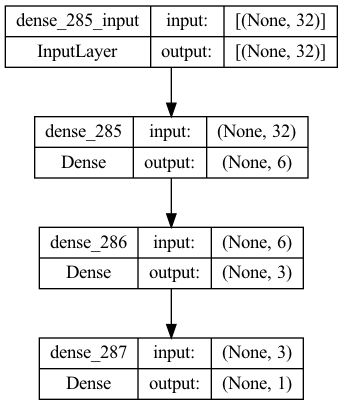

In [314]:
plot_model(model_1, show_shapes=True)

In [315]:
# Evaluate our insurance model trained on normalized data

model_1.evaluate(X_test_normal, y_test)

7/7 [==============================] - 0s 860us/step - loss: 0.4860 - accuracy: 0.7800


[0.4859575927257538, 0.7799999713897705]

Text(0.5, 1.0, 'Model loss curves')

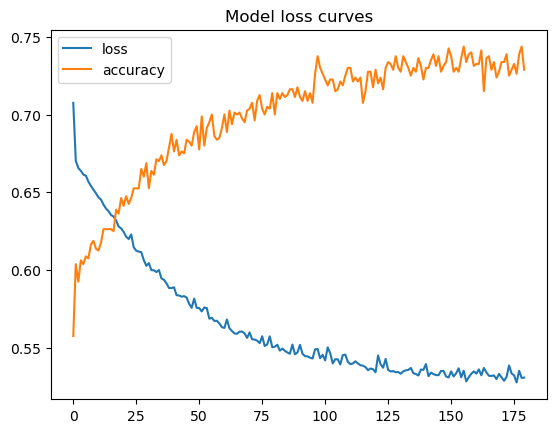

In [316]:
# Plot the loss curves
pd.DataFrame(history_training_model_1.history).plot()
plt.title("Model loss curves")

In [317]:
# Try and make a prediction using our model
y_pred = model_1.predict(data_prediction_normal)
y_pred

1/1 [==============================] - 0s 28ms/step


array([[0.6818506]], dtype=float32)

In [319]:
y_pred[0][0]

0.6818506